<a href="https://colab.research.google.com/github/neeluvermaiitj/Deep-Learning/blob/main/GurNum_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Defining the transformations to be performed on the data
# transforms.ToTensor() converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue.
#                       Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1.
# transforms.Normalize() normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [ ]:
# Download the data sets, shuffle them and transform each of them.
# We download the data sets and load them to DataLoader, which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set.
# batch size is the number of images we want to read in one go

trainset    = datasets.ImageFolder("/content/drive/My Drive/GurNum/train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset    = datasets.ImageFolder("/content/drive/My Drive/GurNum/val", transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [ ]:
dataiter       = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


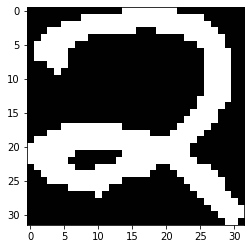

In [ ]:
# The above output shows that there are 64 images with pxel size of 3 x 32 x 32.
# Also, 64 images denote 64 pixels.

plt.imshow(np.transpose(images[0].numpy().squeeze().astype(np.uint8), (1,2,0)), cmap = 'gray_r');

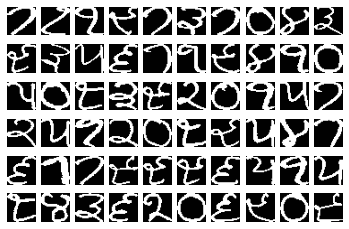

In [ ]:
# Generate a grid of images in a random order.

figure        = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(np.transpose(images[index].numpy().squeeze().astype('uint8'), (1,2,0)), cmap = 'gray_r')

In [ ]:
# The nn.Sequential wraps the layers in the network.
# There are three linear layers with ReLU activation (a simple function which allows positive values to pass through, whereas negative values are modified to zero ).
# The output layer is a linear layer with LogSoftmax activation because this is a classification problem.
# LogSoftmax function is the logarithm of a Softmax function
# We have 3072 units in the first layer because we flatten out each image before sending it inside the neural network (3 * 32 * 32 = 3072).

input_size   = 3072
hidden_sizes = [256, 128, 64]
output_size  = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=3072, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [ ]:
# We define the negative log-likelihood loss. It is useful to train a classification problem with C classes.
# Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss

criterion      = nn.NLLLoss()
images, labels = next(iter(trainloader))
images         = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss  = criterion(logps, labels) #calculate the NLL loss

In [ ]:
# A neural network learns by iterating multiple times over the available data.
# The term learn refers to the adjustment of weights of the network to minimize the loss.
# Before the backward pass, the model weights are set to default none values. Once, we call the backward() function the weights are updated.

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-7.0298e-04, -7.0298e-04, -7.0298e-04,  ..., -7.4946e-04,
         -1.5340e-03, -9.3776e-04],
        [ 4.5914e-04,  1.9894e-04, -1.2744e-04,  ..., -4.3471e-04,
         -6.6986e-04, -7.0267e-04],
        [-7.4429e-05, -7.4429e-05,  5.3033e-05,  ..., -3.3886e-04,
         -4.4896e-04, -7.9840e-06],
        ...,
        [-9.9601e-04, -1.0370e-03, -9.6546e-04,  ..., -8.7199e-04,
         -1.0117e-03, -1.0597e-03],
        [ 2.4622e-04,  2.1110e-04,  2.0292e-05,  ..., -2.0109e-04,
         -5.7207e-04, -3.7785e-04],
        [ 2.8167e-04,  2.8167e-04,  2.8167e-04,  ...,  3.6466e-04,
          3.0288e-04,  3.0288e-04]])


In [ ]:
# Optimizers require the parameters to optimize and a learning rate

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 3072)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss   = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 6.4220e-03, -2.7530e-05, -2.9029e-05,  ...,  1.4868e-02,
          1.0720e-02,  1.5990e-03],
        [-7.9078e-03,  1.4363e-02,  4.3427e-03,  ...,  9.6213e-03,
         -3.7234e-03, -7.7162e-03],
        [ 2.0467e-03,  2.2953e-03, -7.8868e-03,  ...,  1.3602e-02,
          1.1212e-02, -9.6966e-03],
        ...,
        [-4.5622e-03, -3.8175e-04,  1.3138e-02,  ...,  1.0442e-02,
          1.7988e-02, -5.6855e-03],
        [ 2.5883e-03, -4.4371e-03, -1.0778e-03,  ..., -3.6487e-03,
          1.1665e-02, -1.0733e-02],
        [ 3.3845e-03, -1.6652e-02,  2.3416e-03,  ...,  7.4619e-03,
         -3.0013e-03,  8.7791e-03]], requires_grad=True)
Gradient - tensor([[ 3.9554e-04,  3.9554e-04,  3.9554e-04,  ..., -6.5984e-04,
         -4.0682e-04, -1.7586e-04],
        [-3.6020e-04, -7.4097e-04, -7.4932e-04,  ..., -1.0981e-03,
         -5.0237e-04, -3.8224e-04],
        [ 4.1038e-04,  4.7285e-04,  5.5177e-04,  ..., -3.7879e-04,
         -4.5689e-04, -

In [ ]:
# Take an update step and few the new weights

optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 6.4180e-03, -3.1485e-05, -3.2985e-05,  ...,  1.4874e-02,
          1.0725e-02,  1.6008e-03],
        [-7.9042e-03,  1.4370e-02,  4.3502e-03,  ...,  9.6323e-03,
         -3.7184e-03, -7.7124e-03],
        [ 2.0425e-03,  2.2905e-03, -7.8923e-03,  ...,  1.3605e-02,
          1.1217e-02, -9.6943e-03],
        ...,
        [-4.5628e-03, -3.8355e-04,  1.3139e-02,  ...,  1.0441e-02,
          1.7987e-02, -5.6896e-03],
        [ 2.5951e-03, -4.4347e-03, -1.0720e-03,  ..., -3.6390e-03,
          1.1681e-02, -1.0717e-02],
        [ 3.3820e-03, -1.6652e-02,  2.3410e-03,  ...,  7.4593e-03,
         -3.0038e-03,  8.7766e-03]], requires_grad=True)


In [ ]:
# Your neural network iterates over the training set and updates the weights.
# We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation.
# Thus in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.

optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum = 0.9)
time0     = time()
epochs    = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten Gurmukhi images into a 3072 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss   = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss / len(trainloader)))

print("\nTraining Time (in minutes) =",(time() - time0) / 60)

Epoch 0 - Training loss: 2.292308986186981
Epoch 1 - Training loss: 2.239597886800766
Epoch 2 - Training loss: 2.1340135782957077
Epoch 3 - Training loss: 1.9098991230130196
Epoch 4 - Training loss: 1.5134808048605919
Epoch 5 - Training loss: 0.9874695315957069
Epoch 6 - Training loss: 0.5320569239556789
Epoch 7 - Training loss: 0.30979271326214075
Epoch 8 - Training loss: 0.1991434646770358
Epoch 9 - Training loss: 0.1518593728542328
Epoch 10 - Training loss: 0.12087730877101421
Epoch 11 - Training loss: 0.09624440362676978
Epoch 12 - Training loss: 0.07951186900027096
Epoch 13 - Training loss: 0.07958211400546134
Epoch 14 - Training loss: 0.06139674736186862

Training Time (in minutes) = 0.45905811389287315


In [ ]:
# Utility function to show the image and class probabilities that were predicted

def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols = 2)
    ax1.imshow(np.transpose(img.resize_(3, 32, 32).numpy().squeeze(), (1,2,0)))
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Actual Digit = 2
Predicted Digit =  2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


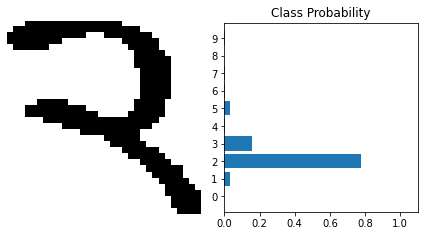

In [ ]:
# Pass an image to the trained model from the validation set that we created earlier, to see how the model works

images, labels = next(iter(valloader))

img = images[0].view(1, 3072)
with torch.no_grad():
    logps = model(img)

ps     = torch.exp(logps)
probab = list(ps.numpy()[0])

print("Actual Digit = {0}".format(labels[0]))
print("Predicted Digit = ", probab.index(max(probab)))
view_classify(img.view(3, 32, 32), ps)

In [ ]:
# Iterate through the validation set using a for loop and calculate the total number of correct predictions. This is how we can calculate the accuracy.

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 3072)
    with torch.no_grad():
        logps = model(img)

    
    ps         = torch.exp(logps)
    probab     = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested = ", all_count)
print("\nModel Accuracy = ", ((correct_count/all_count)) * 100)

Number Of Images Tested =  178

Model Accuracy =  94.3820224719101
